**Large-Scale Structure of the Universe**

Three Main Goals:
1. Plot data from SDSS DR11, RA from 0 to 360 degrees, Dec from -10 to 10 deg, z from 0 to 0.5
2. Using data from step 1, find autocorellation function
3. Use autocorellation function to generate power spectrum


In [3]:
from __future__ import division
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

**1. Plot data from SDSS DR11**

451915
9.9999642
-9.9999003
0


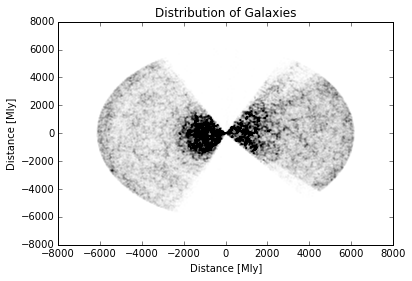

In [3]:
fname = '0to05final.csv'

#extract data from file
data = np.genfromtxt(fname, delimiter=',', skip_header=1)


z = data[:,0]
ra = data[:,1]
dec = data[:,2]

print len(z)
print max(dec)
print min(dec)

#known conversion from redshift to distance from earth
Mly = [3.26*(((3000*x)-(607.8*x**2)-(156.3*x**3)+(138.3*x**4))/0.71) for x in z]

#use distance values to generate x, y positions of galaxies
x_pos = []
y_pos = []
print len(x_pos)
for x in range(0, len(ra)):
    x_pos.append(Mly[x] * np.cos((ra[x]*np.pi)/180))

for x in range(0, len(ra)):
    y_pos.append(Mly[x] * np.sin((ra[x]*np.pi)/180))

#plot values
plt.scatter(x_pos, y_pos, s=0.0001, marker='.')
#plt.xlim(-2000, 2000)
#plt.ylim(-2000, 2000)
plt.xlabel('Distance [Mly]')
plt.ylabel('Distance [Mly]')
plt.title('Distribution of Galaxies')
plt.savefig('largescale_final.pdf')

7851
249.90182
90.620528
0.041121762058
681.650505204


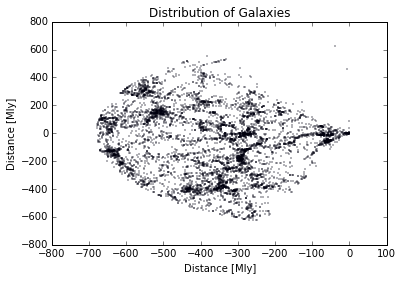

In [32]:
""" Playing around with pulling certain galaxies out
fname = 'trying_something.csv'

data = np.genfromtxt(fname, delimiter=',', skip_header=1)

z = data[:,0]
ra = data[:,1]
dec = data[:,2]

print len(z)
print max(ra)
print min(ra)

Mly = [3.26*(((3000*x)-(607.8*x**2)-(156.3*x**3)+(138.3*x**4))/0.71) for x in z if x > 0]
print min(Mly)
print max(Mly)
x_pos = []
y_pos = []

for x in range(0, len(Mly)):
    x_pos.append(Mly[x] * np.cos((ra[x]*np.pi)/180))

for x in range(0, len(Mly)):
    y_pos.append(Mly[x] * np.sin((ra[x]*np.pi)/180))

plt.scatter(x_pos, y_pos, s=0.5, marker='.')
#plt.xlim(-2000, 2000)
#plt.ylim(-2000, 2000)
plt.xlabel('Distance [Mly]')
plt.ylabel('Distance [Mly]')
plt.title('Distribution of Galaxies')
plt.savefig('trying_something.pdf')
"""

In [1]:
""" 
playing around with plotting methods
plt.axes([0,0,1,1])

#N = 20
#theta = np.arange(0.0, 2*np.pi, 2*np.pi/N)
#radii = 10*np.random.rand(N)
#width = np.pi/4*np.random.rand(N)
###bars = plt.bar(ra, z, bottom=0.0) -DO NOT RUN, COMPUTER CRASHES

for r,bar in zip(radii, bars):
    bar.set_facecolor( cm.jet(r/10.))
    bar.set_alpha(0.5)
"""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-1-10f0026e1d14>, line 13)

**2. Find Two-Point Correlation Function**

In [4]:
data_cf = np.genfromtxt('lsst_small.csv', delimiter = ',', skip_header=1) 

print len(data_cf)

zmin = min(data_cf[:,0])
zmax = max(data_cf[:,0])
RAmin = min(data_cf[:,1])
RAmax = max(data_cf[:,1])
decmin = min(data_cf[:,2])
decmax = max(data_cf[:,2])

print decmin, decmax

9659
-2.9967524 2.9989274


In [5]:
def galaxy(data,RAmin,RAmax):
    """
    Generates galaxy positions of selected RA range of data
    -------------------------------------------------
    Inputs:
    data      -- data file to pull information from, format assumed to be SDSS output
    RAmin/max -- desired minimum and maximum RA values 
    
    Output: 
    numpy array of [x,y] positions of galaxies in desired range
    """
    galaxies=[]
    
    for i in range(0,len(data)): 
        if data[i][1] >= RAmin and data[i][1] <= RAmax: 
            z = data[i][0]
            ra = data[i][1]
            dec = data[i][2]
            Mly = 3.26 * (3000.0*z - 607.8 * z**2 - 156.3 * z**3 + 138.3*z**4)/0.71
            x = Mly*np.cos(ra*np.pi/180)
            y = Mly*np.sin(ra*np.pi/180)
            galaxies.append([x,y])

    return np.array(galaxies)

In [6]:
galaxies = galaxy(data_cf, RAmin=0, RAmax=60)

In [6]:
def randGalaxy(galaxies, zmin,zmax,RAmin,RAmax):
    """
    Creates a random galaxy distribution to match data distribution
    -----------------------------------------------------------------
    Inputs:
    galaxies: a numpy array of [x,y] positions of galaxies- output of galaxy function
    zmin/max: the minimum/maximum red-shift of the data set (float).  
    RAmin/max: the min/max right ascension of the data set (float). 
    
    Output:
    numpy array of [x,y] coordinates of random galaxies in desired range
    """

    #random z numbers in given range:
    zrand = zmax*np.sqrt(np.random.uniform(0,1,len(galaxies)))
    #random ra numbers in given range: 
    rarand = np.random.uniform(RAmin,RAmax,len(galaxies))
    
    #known conversion from redshift to distance from Earth 
    Mly = 3.26 * (3000.0*zrand - 607.8 * zrand**2 - 156.3 * zrand**3 + 138.3*zrand**4)/0.71
    
    #x,y coordinates of randomly distributed galaxies: 
    xrand = Mly*np.cos(rarand*np.pi/180)
    yrand = Mly*np.sin(rarand*np.pi/180)
    
    rgalaxies=zip(xrand,yrand)
    
    return np.array(rgalaxies)


In [8]:
rgalaxies = randGalaxy(galaxies, zmin=zmin, zmax=zmax, RAmin=0, RAmax=60)

In [7]:
def galaxyPairFinder(galaxies,randomGalaxies):
    """
    Finds the distance between all pairs of galaxies from
    both the data and the random distribution.
    -------------------------------------------------
    Inputs:
    galaxies       -- numpy array of [x,y] positions of galaxies from SDSS data (output of galaxy function)
    randomGalaxies -- numpy array of [x,y] positions of random galaxies (output of randGalaxy function)
    """
    d = []
    dr= [] 
    for i in range(0,len(galaxies)): 
        for j in range(0,len(galaxies)): 
            if j > i: 
                d.append(np.sqrt((galaxies[i][0] - galaxies[j][0])**2 + (galaxies[i][1] - galaxies[j][1])**2))
                #want every unique pair of real data
            dr.append(np.sqrt((galaxies[i][0] - randomGalaxies[j][0])**2 +(galaxies[i][1] - randomGalaxies[j][1])**2))
            #every possible pair of random galaxies with real galaxy data, do not have to worry about uniqueness 
    return np.array([d,dr])
    

In [10]:
gpairs = galaxyPairFinder(galaxies, rgalaxies)

In [8]:
def twoPointCorr(galaxyPairs,Nbins): 
    """
    Calculates the two-point correlation function of a set of galaxies,
    using already created pairs of distances
    -------------------------------------------------
    Inputs:
    galaxyPairs -- numpy array of distances between real and random galaxies [d, dr] (output of galaxyPairFinder function)
    Nbins       -- desired number of bins to use
    
    Output:
    numpy array of bins and xi values [r, xi]
    """
    
    #find min/max distances between random galaxies
    rmin = min(galaxyPairs[1])
    rmax = max(galaxyPairs[1])

    r = np.linspace(rmin,rmax,Nbins) #set up bins
    
    #create empty arrays to build using bins
    ddr = []
    rrr = []
    for i in range(0, len(r)-1): 
        counterD=0.0
        counterR=0.0 
        for w in galaxyPairs[0]: 
            #for each value of distances between real galaxies, determine whether it belongs in current bin "w"
            if w>=r[i] and w<r[i+1]: 
                counterD+=1.0 
        for k in galaxyPairs[1]: 
            #repeat process of bin finding for random galaxies
            if k>= r[i] and k<r[i+1]: 
                counterR+=1.0 
        rrr.append(counterR)
        ddr.append(counterD)

    ddr = np.array(ddr)
    rrr = np.array(rrr)
    #calculate xi
    xi = (float(len(galaxyPairs[1]))/(float(len(galaxyPairs[0]))))*(ddr/rrr) - 1.0
    return np.array(zip(r,xi))

In [12]:
tpcr = twoPointCorr(gpairs, 100)

**3. Creating a Power Spectrum**


In [9]:
def powerSpectrum(galaxyPairs,Nbins,twoPoint):
    """
    Finds the power spectrum of input data
    
    Inputs:
    galaxyPairs -- numpy array of distances between real and random galaxies [d, dr] (output of galaxyPairFinder function)
    Nbins       -- desired number of bins to use
    twoPoint    -- output of twoPointCorr function
    
    Output:
    numpy array of [frequency, positive real fft values]
    """
    
    #find min and max of the distance between galaxies to create bins:
    rmin = min(galaxyPairs[0])*(1/(0.70*3.26)) #convert Mly -> Mpc
    rmax = max(galaxyPairs[0])*(1/(0.70*3.26))

    signal = twoPoint[:,1] #get values corresponding to positive frequencies
    fourier = np.fft.fft(signal)
    
    n = signal.size 
    waveLength = (rmax - rmin)/Nbins 
    
    freq =np.linspace(0,(n/2+1)*2.*(1/waveLength),n/2+1)
    fourier_pos = fourier[:n/2+1]
    
    return np.array([freq,fourier_pos.real])

**Combining all functions of 2 / 3 **

In [10]:
def largeScaleStructure(data,RAmin,RAmax,Nbins):
    """
    Combines functions related to the large scale structure and plots:
    1. Galaxy data in used field from SDSS
    2. Distribution of random galaxies
    3. Two-point correlation function
    4. Fourier Transform of Two-Point Correlation Function (Power Spectrum)
    Inputs:
    data      -- data to use, taken from SDSS
    RAmin/max -- desired minimum and maximum of RA range
    Nbins     -- amount of bins to use for two-point correlation function
    
    """
    zmin = min(data[:,0])
    zmax = max(data[:,0])
    
    galaxies = galaxy(data,RAmin,RAmax)
    randomGalaxies =  randGalaxy(galaxies,zmin,zmax,RAmin,RAmax)
    galaxyPairs = galaxyPairFinder(galaxies,randomGalaxies)
    twoPoint = twoPointCorr(galaxyPairs,Nbins)
    powerSpectra = powerSpectrum(galaxyPairs,Nbins,twoPoint)
    
    #plot galaxies from sdss: 
    plt.scatter(galaxies[:,0],galaxies[:,1],s=2)
    plt.title('Galaxy Distribution: %f <z< %f' % (zmin, zmax))
    plt.xlabel('Distance from Earth [Mly]')
    plt.ylabel('Distance from Earth [Mly]')
    plt.savefig('realdata.pdf')
    plt.show()
    
    #plot random galaxies: 
    plt.clf()
    plt.scatter(randomGalaxies[:,0],randomGalaxies[:,1])
    plt.title('Random Galaxy Distrubition')
    plt.xlabel('Distance from Earth [Mly]')
    plt.ylabel('Distance from Earth [Mly]')
    plt.savefig('randomdata.pdf')
    plt.show()
    
    #plot two-point correlation function: 
    plt.clf()
    plt.scatter(twoPoint[:,0]*(1/(0.70*3.26)),twoPoint[:,1]) #convert Mly -> Mpc
    #plt.xlim(0,500000)
    #plt.ylim(-2,2)
    plt.title('Two-Point Correlation Function')
    plt.xlabel(r'$f [h^{-1}Mpc]$')
    plt.ylabel(r'$\xi(r)$')
    #plt.yscale('log')
    plt.savefig('tpcf.pdf')
    plt.show()
    
    #plot power spectrum
    plt.clf()
    plt.scatter(powerSpectra[0],powerSpectra[1])
    plt.title('Power Spectrum')
    plt.xlabel(r'$f [h{Mpc}^{-1}]$')
    plt.ylabel(r'$F(\xi(r))$')
    plt.xlim(0,36)
    plt.ylim(-20,40)
    plt.savefig('power_spectrum.pdf')
    plt.show()


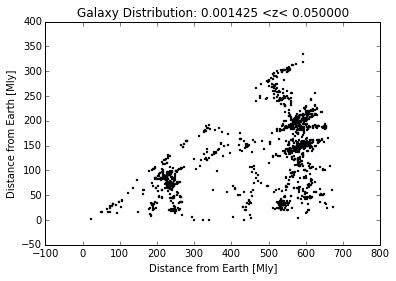

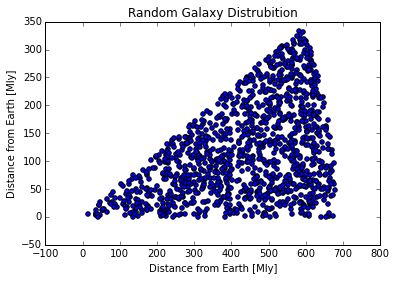

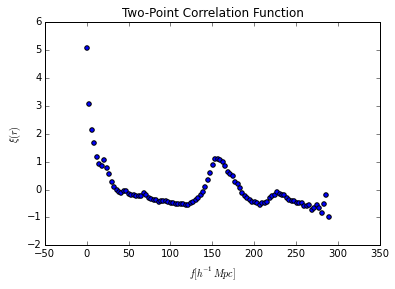

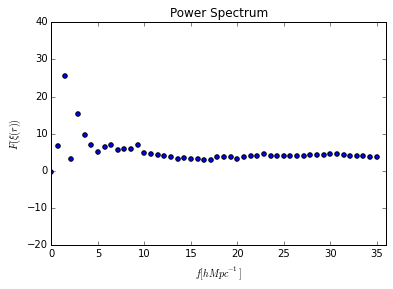

In [11]:
largeScaleStructure(data_cf, RAmin=0, RAmax=30, Nbins=100)